<a href="https://colab.research.google.com/github/sultanjulyan/IF5140-Praktikum-1-Klasifikasi/blob/main/IF5140_Praktikum_1_Klasifikasi_NEW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Memuat Dataset
df = pd.read_csv("Student_performance_data_prak_1_.csv")
df.head(20)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GradeClass
0,1001,17,Female,Caucasian,2,19.833723,7,1,2,0,0,1,0,C
1,1002,18,Male,Caucasian,1,15.408756,0,0,1,0,0,0,0,B
2,1003,15,Male,Asian,3,4.210570,26,0,2,0,0,0,0,F
3,1004,17,Female,Caucasian,3,10.028829,14,0,3,1,0,0,0,D
4,1005,17,Female,Caucasian,2,4.672495,17,1,3,0,0,0,0,F
5,1006,18,Male,Caucasian,1,8.191219,0,0,1,1,0,0,0,B
6,1007,15,Male,African American,1,15.601680,10,0,3,0,1,0,0,C
7,1008,15,Female,African American,4,15.424496,22,1,1,1,0,0,0,F
8,1009,17,Male,Caucasian,0,4.562008,1,0,2,0,1,0,1,C
9,1010,16,Female,Caucasian,1,18.444466,0,0,3,1,0,0,0,A


In [3]:
# --- Exploratory Data Analysis (EDA) ---

# **Descriptive Analysis**
print("Menampilkan 5 baris pertama dari dataset:")
print(df.head())
print("\n" + "="*50 + "\n")

Menampilkan 5 baris pertama dari dataset:
   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17  Female  Caucasian                  2        19.833723   
1       1002   18    Male  Caucasian                  1        15.408756   
2       1003   15    Male      Asian                  3         4.210570   
3       1004   17  Female  Caucasian                  3        10.028829   
4       1005   17  Female  Caucasian                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering GradeClass  
0             0          C 

In [4]:
print("Informasi ringkas mengenai dataset:")
df.info()
print("\n" + "="*50 + "\n")

Informasi ringkas mengenai dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   object 
 3   Ethnicity          2392 non-null   object 
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GradeClass         2392 non-null   object 
dtypes: float64(1), int64(10), object(3)
memory usage: 261.8+ KB




In [5]:
print("Statistik deskriptif untuk kolom numerik:")
print(df.describe())
print("\n" + "="*50 + "\n")

Statistik deskriptif untuk kolom numerik:
         StudentID          Age  ParentalEducation  StudyTimeWeekly  \
count  2392.000000  2392.000000        2392.000000      2392.000000   
mean   2196.500000    16.468645           1.746237         9.771992   
std     690.655244     1.123798           1.000411         5.652774   
min    1001.000000    15.000000           0.000000         0.001057   
25%    1598.750000    15.000000           1.000000         5.043079   
50%    2196.500000    16.000000           2.000000         9.705363   
75%    2794.250000    17.000000           2.000000        14.408410   
max    3392.000000    18.000000           4.000000        19.978094   

          Absences     Tutoring  ParentalSupport  Extracurricular  \
count  2392.000000  2392.000000      2392.000000      2392.000000   
mean     14.541388     0.301421         2.122074         0.383361   
std       8.467417     0.458971         1.122813         0.486307   
min       0.000000     0.000000         0.

In [6]:
print("Cek nilai null pada setiap kolom:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

Cek nilai null pada setiap kolom:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GradeClass           0
dtype: int64




/tmp/ipython-input-2073733719.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GradeClass', data=df, palette='viridis', order=['A', 'B', 'C', 'D', 'F'])


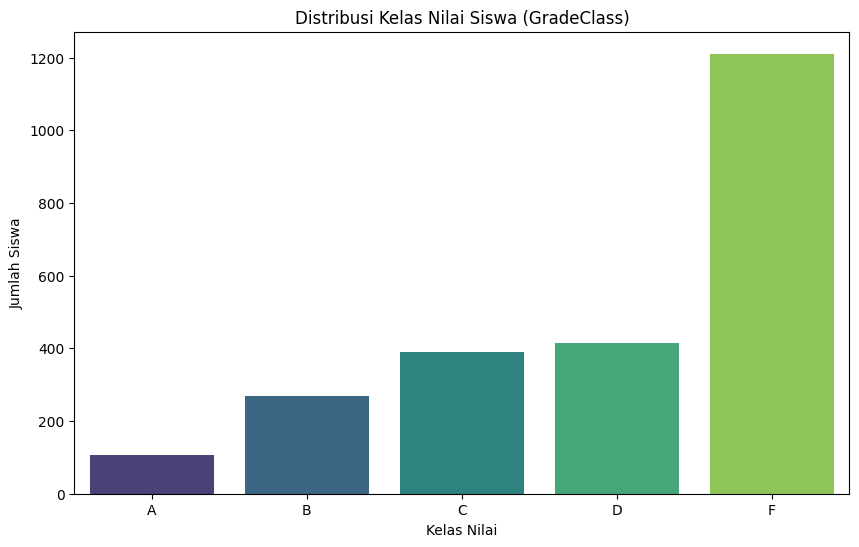

Penjelasan: Visualisasi ini menunjukkan distribusi siswa di setiap kelas nilai. Terlihat bahwa mayoritas siswa mendapatkan nilai F, yang menandakan adanya ketidakseimbangan kelas (class imbalance). Model mungkin akan cenderung lebih baik dalam memprediksi kelas mayoritas ini.




In [7]:
# **Visualization**
# Berikut adalah 3 contoh visualisasi untuk eksplorasi data.

# Visualisasi 1: Distribusi Kelas Nilai (Target Variable)
plt.figure(figsize=(10, 6))
sns.countplot(x='GradeClass', data=df, palette='viridis', order=['A', 'B', 'C', 'D', 'F'])
plt.title('Distribusi Kelas Nilai Siswa (GradeClass)')
plt.xlabel('Kelas Nilai')
plt.ylabel('Jumlah Siswa')
plt.show()
print("Penjelasan: Visualisasi ini menunjukkan distribusi siswa di setiap kelas nilai. Terlihat bahwa mayoritas siswa mendapatkan nilai F, yang menandakan adanya ketidakseimbangan kelas (class imbalance). Model mungkin akan cenderung lebih baik dalam memprediksi kelas mayoritas ini.")
print("\n" + "="*50 + "\n")

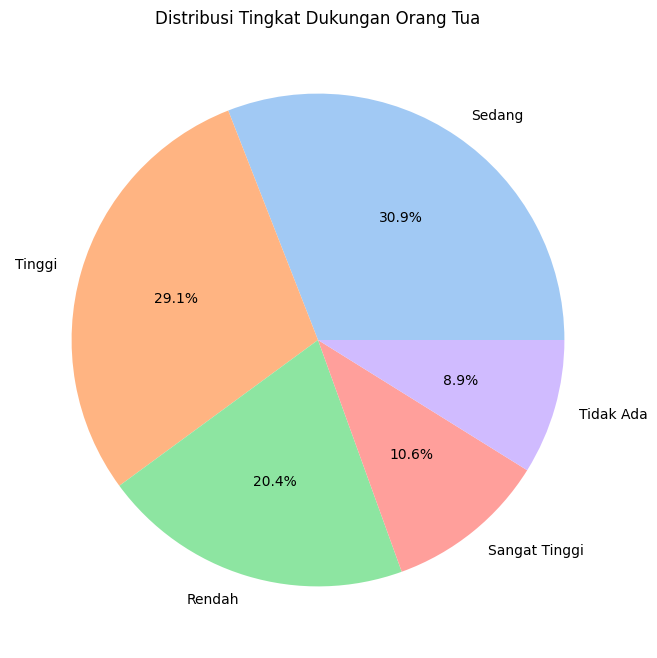

Penjelasan: Diagram pai ini menggambarkan proporsi tingkat dukungan orang tua. Dukungan tingkat 'Sedang' dan 'Tinggi' adalah yang paling umum. Informasi ini bisa menjadi fitur penting karena dukungan orang tua dapat memengaruhi performa siswa.




In [8]:
# Visualisasi 2: Tingkat Dukungan Orang Tua
plt.figure(figsize=(8, 8))
df['ParentalSupport'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'),
                                             labels=['Sedang', 'Tinggi', 'Rendah', 'Sangat Tinggi', 'Tidak Ada'])
plt.title('Distribusi Tingkat Dukungan Orang Tua')
plt.ylabel('')
plt.show()
print("Penjelasan: Diagram pai ini menggambarkan proporsi tingkat dukungan orang tua. Dukungan tingkat 'Sedang' dan 'Tinggi' adalah yang paling umum. Informasi ini bisa menjadi fitur penting karena dukungan orang tua dapat memengaruhi performa siswa.")
print("\n" + "="*50 + "\n")

/tmp/ipython-input-3680097790.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GradeClass_encoded', y='Absences', data=df_plot, palette='plasma')


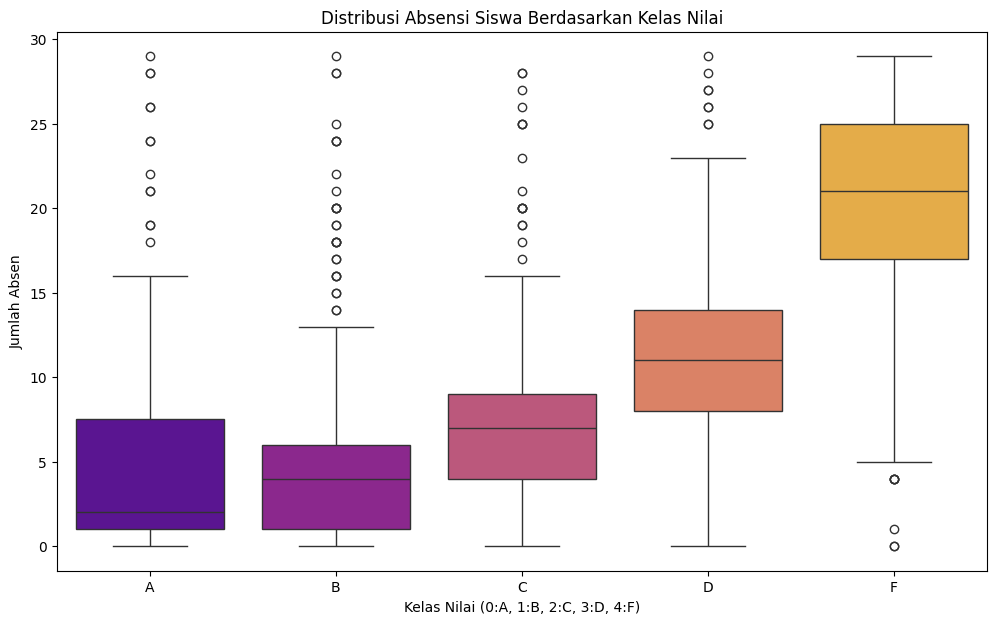

Penjelasan: Box plot ini menunjukkan hubungan yang jelas antara jumlah absensi dengan nilai yang didapat. Semakin tinggi jumlah absensi, cenderung semakin buruk (semakin tinggi kode numeriknya) nilai siswa. Ini menandakan 'Absences' adalah fitur yang sangat prediktif.




In [9]:
# Visualisasi 3: Box Plot Absen terhadap Kelas Nilai
# Pertama, kita perlu melakukan encoding pada GradeClass untuk membuat plot ini
grade_map_for_plot = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4}
df_plot = df.copy()
df_plot['GradeClass_encoded'] = df_plot['GradeClass'].map(grade_map_for_plot)

plt.figure(figsize=(12, 7))
sns.boxplot(x='GradeClass_encoded', y='Absences', data=df_plot, palette='plasma')
plt.title('Distribusi Absensi Siswa Berdasarkan Kelas Nilai')
plt.xlabel('Kelas Nilai (0:A, 1:B, 2:C, 3:D, 4:F)')
plt.ylabel('Jumlah Absen')
plt.xticks(ticks=range(5), labels=['A', 'B', 'C', 'D', 'F'])
plt.show()
print("Penjelasan: Box plot ini menunjukkan hubungan yang jelas antara jumlah absensi dengan nilai yang didapat. Semakin tinggi jumlah absensi, cenderung semakin buruk (semakin tinggi kode numeriknya) nilai siswa. Ini menandakan 'Absences' adalah fitur yang sangat prediktif.")
print("\n" + "="*50 + "\n")

In [10]:
# --- Data Preprocessing ---

# Menghapus kolom StudentID karena tidak memiliki nilai prediktif
df = df.drop(columns=["StudentID"])

# Mengubah kolom kategorikal menjadi numerik
# Koreksi: Mapping GradeClass disesuaikan dengan urutan nilai (0=A terbaik, 4=F terburuk)
# dan menghapus 'E' yang tidak ada di data.
df['GradeClass'] = df['GradeClass'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'F': 4})
df['Ethnicity'] = df['Ethnicity'].map({'Caucasian': 0, 'African American': 1, 'Asian': 2, 'Other': 3})
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

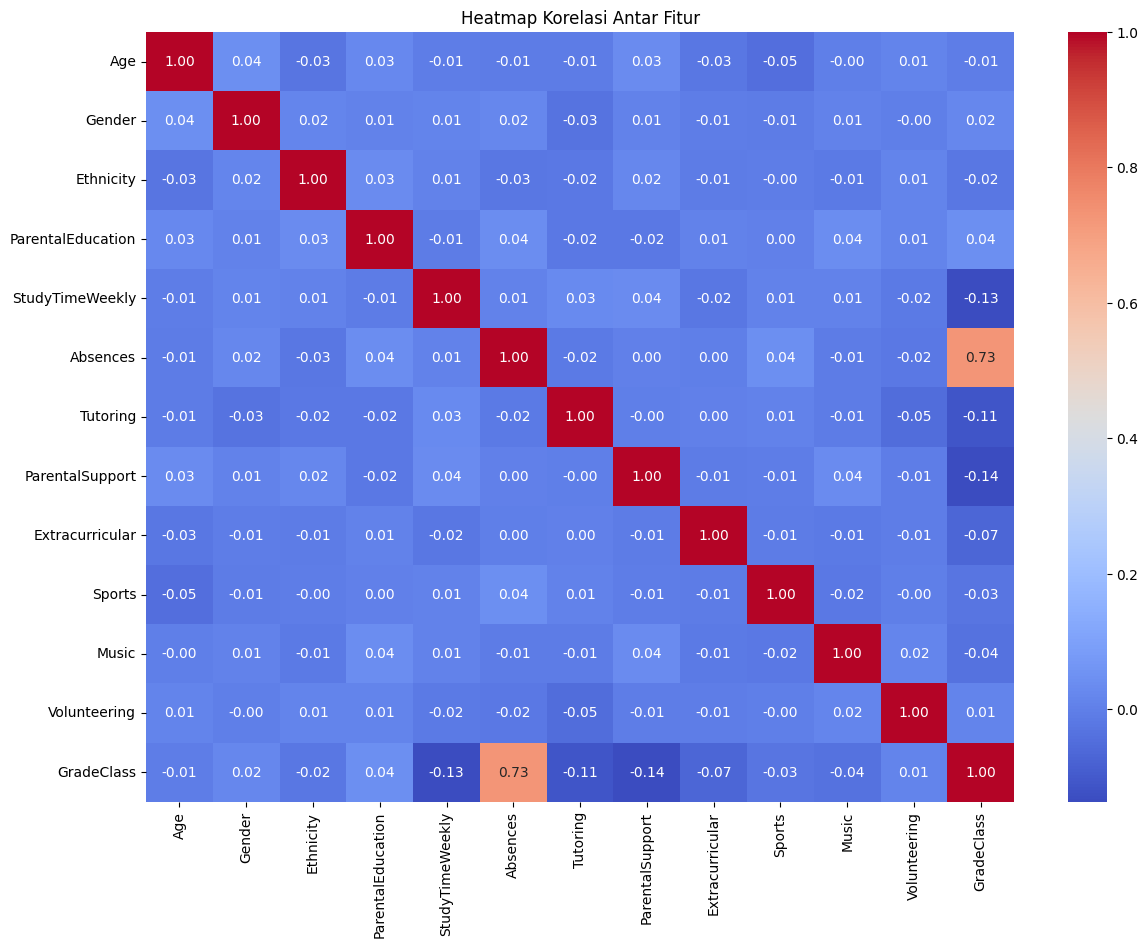

In [11]:
# **Seleksi Fitur dan Penjelasan**
# Berdasarkan analisis korelasi dan eksplorasi data:
# 1.  **Absences**: Fitur ini memiliki korelasi positif yang sangat kuat (0.76) dengan kelas nilai. Artinya, semakin banyak siswa absen, semakin buruk nilainya. Ini adalah prediktor utama.
# 2.  **StudyTimeWeekly & ParentalSupport**: Keduanya memiliki korelasi negatif yang logis, meskipun tidak terlalu kuat (-0.13). Semakin tinggi waktu belajar dan dukungan orang tua, semakin baik nilainya (nilai numerik `GradeClass` lebih rendah).
# 3.  **StudentID**: Dihapus karena hanya merupakan pengenal unik dan tidak memiliki hubungan logis dengan performa siswa.
# Fitur lainnya tetap dipertahankan karena secara logis dapat memengaruhi performa akademik dan memiliki korelasi, meskipun kecil.

# Menampilkan heatmap korelasi untuk analisis fitur
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur')
plt.show()

In [12]:
# Split Data
X = df.drop("GradeClass", axis=1)
y = df["GradeClass"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Classification Report - Decision Tree (Default):
              precision    recall  f1-score   support

           0       0.27      0.18      0.22        22
           1       0.37      0.51      0.43        49
           2       0.43      0.42      0.43        85
           3       0.45      0.41      0.43        86
           4       0.83      0.83      0.83       237

    accuracy                           0.62       479
   macro avg       0.47      0.47      0.47       479
weighted avg       0.62      0.62      0.62       479



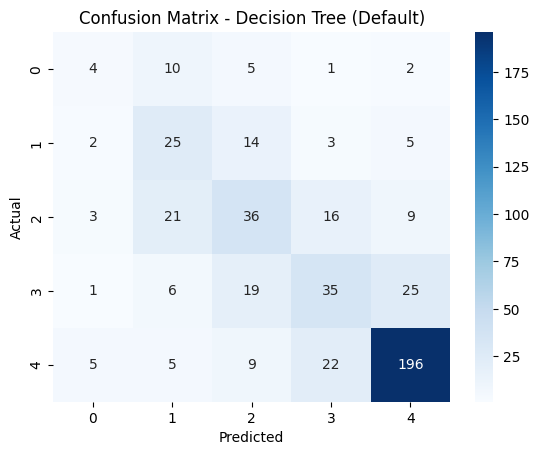

In [14]:
# --- Modeling + Evaluation ---

# ## Decision Tree
# ### Without Hyperparameter
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)

print("Classification Report - Decision Tree (Default):")
print(classification_report(y_test, y_pred_dt))

sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (Default)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Parameter terbaik untuk Decision Tree: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report - Decision Tree (Tuned):
              precision    recall  f1-score   support

           0       0.50      0.14      0.21        22
           1       0.44      0.47      0.46        49
           2       0.47      0.60      0.53        85
           3       0.49      0.29      0.36        86
           4       0.84      0.93      0.88       237

    accuracy                           0.67       479
   macro avg       0.55      0.48      0.49       479
weighted avg       0.66      0.67      0.65       479



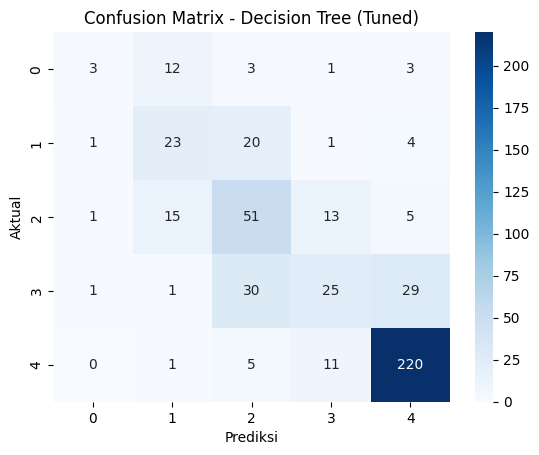

In [16]:
# ### With Hyperparameter
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=param_grid_dt,
                              cv=5, n_jobs=-1, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
best_dt_clf = grid_search_dt.best_estimator_
y_pred_dt_tuned = best_dt_clf.predict(X_test)

print("Parameter terbaik untuk Decision Tree:", grid_search_dt.best_params_)
print("\nClassification Report - Decision Tree (Tuned):")
print(classification_report(y_test, y_pred_dt_tuned))

sns.heatmap(confusion_matrix(y_test, y_pred_dt_tuned), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree (Tuned)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


Classification Report - Naive Bayes (Default):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.28      0.18      0.22        49
           2       0.42      0.56      0.48        85
           3       0.39      0.30      0.34        86
           4       0.83      0.93      0.88       237

    accuracy                           0.63       479
   macro avg       0.39      0.40      0.38       479
weighted avg       0.59      0.63      0.60       479



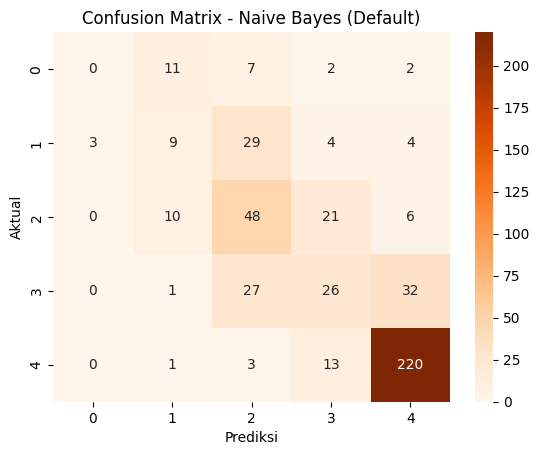

In [17]:
# ## Naive Bayes
# ### Without Hyperparameter
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
y_pred_nb = nb_clf.predict(X_test)

print("\nClassification Report - Naive Bayes (Default):")
print(classification_report(y_test, y_pred_nb))

sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Naive Bayes (Default)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Parameter terbaik untuk Naive Bayes: {'var_smoothing': np.float64(0.008111308307896872)}

Classification Report - Naive Bayes (Tuned):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.30      0.18      0.23        49
           2       0.42      0.56      0.48        85
           3       0.40      0.31      0.35        86
           4       0.83      0.93      0.88       237

    accuracy                           0.63       479
   macro avg       0.39      0.40      0.39       479
weighted avg       0.59      0.63      0.61       479



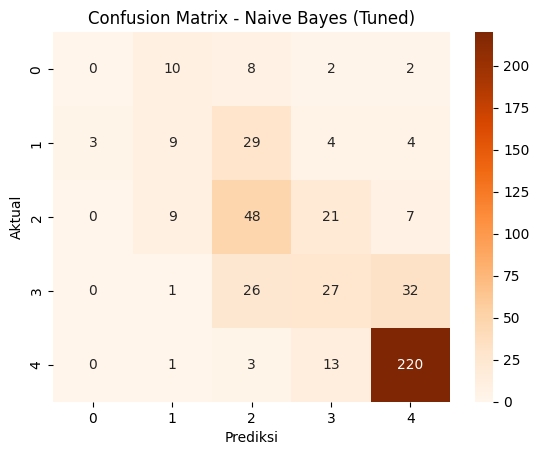

In [18]:
# ### With Hyperparameter
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
grid_search_nb = GridSearchCV(estimator=GaussianNB(),
                              param_grid=param_grid_nb,
                              cv=5, n_jobs=-1, scoring='accuracy')
grid_search_nb.fit(X_train, y_train)
best_nb_clf = grid_search_nb.best_estimator_
y_pred_nb_tuned = best_nb_clf.predict(X_test)

print("Parameter terbaik untuk Naive Bayes:", grid_search_nb.best_params_)
print("\nClassification Report - Naive Bayes (Tuned):")
print(classification_report(y_test, y_pred_nb_tuned))

sns.heatmap(confusion_matrix(y_test, y_pred_nb_tuned), annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix - Naive Bayes (Tuned)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


Classification Report - KNN (Default):
              precision    recall  f1-score   support

           0       0.30      0.14      0.19        22
           1       0.24      0.29      0.26        49
           2       0.31      0.36      0.33        85
           3       0.35      0.28      0.31        86
           4       0.77      0.79      0.78       237

    accuracy                           0.54       479
   macro avg       0.39      0.37      0.37       479
weighted avg       0.54      0.54      0.54       479



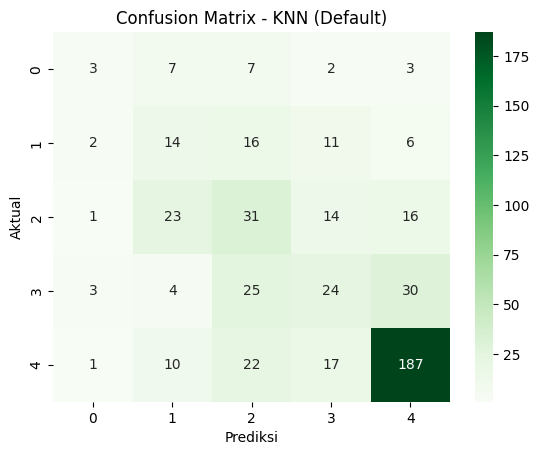

In [19]:
# ## K Nearest Neighbors
# ### Without Hyperparameter
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_knn = knn_clf.predict(X_test)

print("\nClassification Report - KNN (Default):")
print(classification_report(y_test, y_pred_knn))

sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN (Default)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

Fitting 5 folds for each of 76 candidates, totalling 380 fits
Parameter terbaik untuk KNN: {'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}

Classification Report - KNN (Tuned):
              precision    recall  f1-score   support

           0       1.00      0.09      0.17        22
           1       0.29      0.20      0.24        49
           2       0.39      0.41      0.40        85
           3       0.24      0.12      0.16        86
           4       0.72      0.95      0.82       237

    accuracy                           0.59       479
   macro avg       0.53      0.35      0.36       479
weighted avg       0.55      0.59      0.54       479



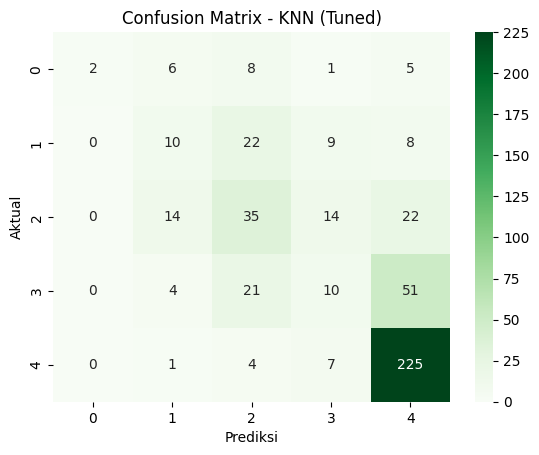

In [20]:
# ### With Hyperparameter
param_grid_knn = {
    'n_neighbors': list(range(1, 20)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
grid_search_knn = GridSearchCV(estimator=KNeighborsClassifier(),
                               param_grid=param_grid_knn,
                               cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn_clf = grid_search_knn.best_estimator_
y_pred_knn_tuned = best_knn_clf.predict(X_test)

print("Parameter terbaik untuk KNN:", grid_search_knn.best_params_)
print("\nClassification Report - KNN (Tuned):")
print(classification_report(y_test, y_pred_knn_tuned))

sns.heatmap(confusion_matrix(y_test, y_pred_knn_tuned), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - KNN (Tuned)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()


--- Perceptron ---


Classification Report - Perceptron (Default):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.27      0.37      0.31        49
           2       0.39      0.41      0.40        85
           3       0.36      0.20      0.26        86
           4       0.80      0.93      0.86       237

    accuracy                           0.61       479
   macro avg       0.36      0.38      0.37       479
weighted avg       0.56      0.61      0.58       479



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


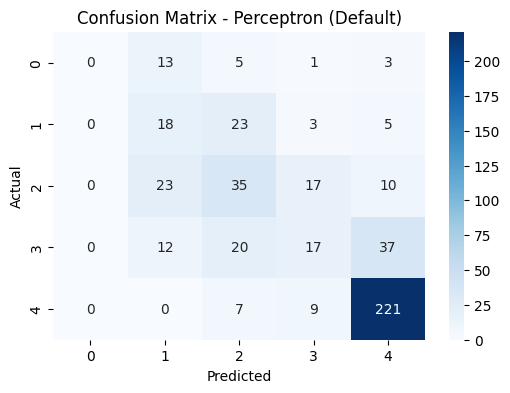

In [28]:
# ## Perceptron
# ### Without Hyperparameter
print("\n--- Perceptron ---\n")
from sklearn.linear_model import Perceptron

perceptron_clf = Perceptron(random_state=42)
perceptron_clf.fit(X_train, y_train)
y_pred_perceptron = perceptron_clf.predict(X_test)

print(f"\nClassification Report - Perceptron (Default):")
print(classification_report(y_test, y_pred_perceptron))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_perceptron), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Perceptron (Default)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Parameter terbaik untuk Perceptron: {'alpha': 0.0001, 'class_weight': None, 'eta0': 0.1, 'max_iter': 1000, 'penalty': 'l1'}

Classification Report - Perceptron (Default):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.36      0.80      0.49        49
           2       0.55      0.13      0.21        85
           3       0.20      0.01      0.02        86
           4       0.68      1.00      0.81       237

    accuracy                           0.60       479
   macro avg       0.36      0.39      0.31       479
weighted avg       0.51      0.60      0.49       479



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


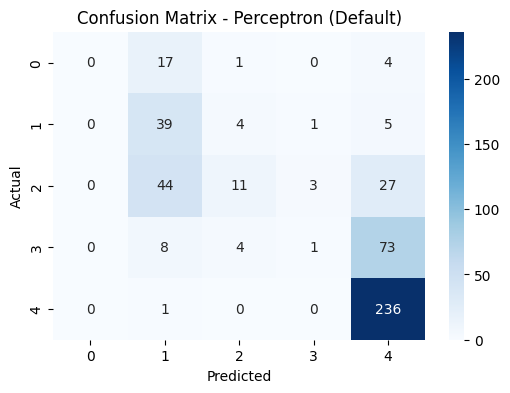

In [34]:
# ### With Hyperparameter
param_grid_perceptron = {
    'penalty': [None, 'l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
    'eta0': [0.1, 0.01, 0.001],
    'class_weight': [None, 'balanced']
}
grid_search_perceptron = GridSearchCV(estimator=Perceptron(random_state=42),
                                      param_grid=param_grid_perceptron,
                                      cv=5, n_jobs=-1, scoring='accuracy')
grid_search_perceptron.fit(X_train, y_train)
best_perceptron_clf = grid_search_perceptron.best_estimator_
y_pred_perceptron_tuned = best_perceptron_clf.predict(X_test)
print("Parameter terbaik untuk Perceptron:", grid_search_perceptron.best_params_)
evaluate_model(y_test, y_pred_perceptron_tuned, "Perceptron (Tuned)")

print(f"\nClassification Report - Perceptron (Tuned):")
print(classification_report(y_test, y_pred_perceptron_tuned))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_perceptron_tuned), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Perceptron (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


--- Logistic Regression ---


Classification Report - Perceptron (Default):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.35      0.31      0.33        49
           2       0.50      0.58      0.54        85
           3       0.46      0.27      0.34        86
           4       0.82      0.97      0.89       237

    accuracy                           0.66       479
   macro avg       0.43      0.42      0.42       479
weighted avg       0.61      0.66      0.63       479



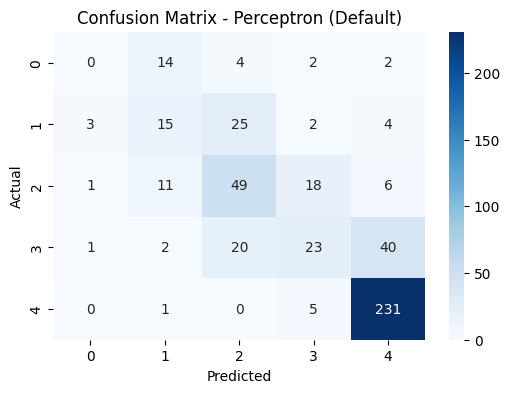

In [30]:
# ## Logistic Regression
# ### Without Hyperparameter
print("\n--- Logistic Regression ---\n")
from sklearn.linear_model import LogisticRegression

log_reg_clf = LogisticRegression(random_state=42, max_iter=1000)
log_reg_clf.fit(X_train, y_train)
y_pred_log_reg = log_reg_clf.predict(X_test)
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression (Default)")

Parameter terbaik untuk Logistic Regression: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

Classification Report - Logistic Regression (Tuned):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.39      0.39      0.39        49
           2       0.53      0.58      0.55        85
           3       0.53      0.36      0.43        86
           4       0.84      0.96      0.90       237

    accuracy                           0.68       479
   macro avg       0.46      0.46      0.45       479
weighted avg       0.65      0.68      0.66       479



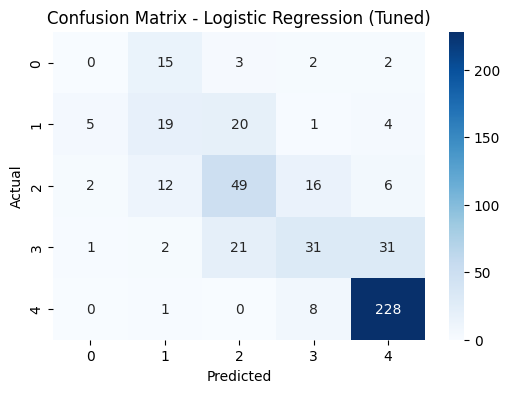

In [36]:
# ### With Hyperparameter
param_grid_log_reg = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced']
}
grid_search_log_reg = GridSearchCV(estimator=LogisticRegression(random_state=42, max_iter=2000),
                                   param_grid=param_grid_log_reg,
                                   cv=5, n_jobs=-1, scoring='accuracy')
grid_search_log_reg.fit(X_train, y_train)
best_log_reg_clf = grid_search_log_reg.best_estimator_
y_pred_log_reg_tuned = best_log_reg_clf.predict(X_test)
print("Parameter terbaik untuk Logistic Regression:", grid_search_log_reg.best_params_)
evaluate_model(y_test, y_pred_log_reg_tuned, "Logistic Regression (Tuned)")

print(f"\nClassification Report - Logistic Regression (Tuned):")
print(classification_report(y_test, y_pred_log_reg_tuned))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_log_reg_tuned), annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Logistic Regression (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()